<img src="houses.jpg" style="width:100%;height:400px"/>

# House Sale Prices Regression

These house types are designed for the US and Canada . All of these house properties are related to a price. Which property is more or less expensive?All of these correlations are good to observe which is what I am going to do in this project.Whatever it takes: far from a highway, far from a mall? What does really impact on a price or what is optimal price, or is there an outlier? A lot of questions and considerations. I am going to answer these question doing some research and statistics in this project. 

original version of the dataset https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Train and Test Data 
train = '/Users/ceo/Desktop/'
traindf=  pd.read_csv(train + 'train.csv') 
traindf.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Exploratory data analysis

### output

In [3]:
#exploring  what data types and if any missing values
traindf = traindf.reindex(sorted(traindf.columns), axis=1) #sorting data alphabetically
print(traindf.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1460 non-null   int64  
 2   3SsnPorch      1460 non-null   int64  
 3   Alley          91 non-null     object 
 4   BedroomAbvGr   1460 non-null   int64  
 5   BldgType       1460 non-null   object 
 6   BsmtCond       1423 non-null   object 
 7   BsmtExposure   1422 non-null   object 
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtFinType1   1423 non-null   object 
 11  BsmtFinType2   1422 non-null   object 
 12  BsmtFullBath   1460 non-null   int64  
 13  BsmtHalfBath   1460 non-null   int64  
 14  BsmtQual       1423 non-null   object 
 15  BsmtUnfSF      1460 non-null   int64  
 16  CentralAir     1460 non-null   object 
 17  Condition1     1460 non-null   object 
 18  Conditio

In [4]:
print(traindf.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [5]:
#printing first 5 rows
traindf.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706,0,...,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,...,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,...,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,...,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,...,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008


In [ ]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 2919)
#display(combined.isnull().sum())

In [6]:
print(traindf['LotFrontage'].value_counts(dropna=False))
print(traindf['LotArea'].value_counts(dropna=False))

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64


#  Data Wrangling  techniques 

In [7]:
traindf['BsmtCond'].fillna(traindf['BsmtCond'].mode()[0], inplace=True)  # filling NaN or missing value
traindf['BsmtExposure'].fillna(traindf['BsmtExposure'].mode()[0], inplace=True)  
traindf['BsmtQual'].fillna(traindf['BsmtQual'].mode()[0], inplace=True) 
traindf['BsmtFinType1'].fillna(traindf['BsmtFinType1'].mode()[0], inplace=True)  
traindf['BsmtFinType2'].fillna(traindf['BsmtFinType2'].mode()[0], inplace=True)  
traindf['Electrical'].fillna(traindf['Electrical'].mode()[0], inplace=True)  
traindf['FireplaceQu'].fillna(traindf['FireplaceQu'].mode()[0], inplace=True)  
traindf['GarageArea'].fillna(traindf['GarageArea'].mode()[0], inplace=True)  
traindf['GarageCond'].fillna(traindf['GarageCond'].mode()[0], inplace=True)  
traindf['GarageFinish'].fillna(traindf['GarageFinish'].mode()[0], inplace=True)  
traindf['GarageQual'].fillna(traindf['GarageQual'].mode()[0], inplace=True)  
traindf['GarageType'].fillna(traindf['GarageType'].mode()[0], inplace=True)  
traindf['MasVnrType'].fillna(traindf['MasVnrType'].mode()[0], inplace=True)  


traindf.GarageYrBlt.fillna(traindf.GarageYrBlt.median(),inplace=True)
traindf.LotFrontage.fillna(traindf.LotFrontage.median(),inplace=True)
traindf.MasVnrArea.fillna(traindf.MasVnrArea.median(),inplace=True)




In [8]:
traindf.drop(['Alley'], axis=1, inplace=True)
traindf.drop(['PoolQC'], axis=1, inplace=True)
traindf.drop(['MiscFeature'], axis=1, inplace=True)
traindf.drop(['Fence'], axis=1, inplace=True)
#dropping extra column that is will not be used in any ways  and adds a noise.
traindf.drop(['Id'], axis=1, inplace=True)

In [9]:
traindf.info()  #checking if missing values are filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1460 non-null   int64  
 2   3SsnPorch      1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   BldgType       1460 non-null   object 
 5   BsmtCond       1460 non-null   object 
 6   BsmtExposure   1460 non-null   object 
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtFinType1   1460 non-null   object 
 10  BsmtFinType2   1460 non-null   object 
 11  BsmtFullBath   1460 non-null   int64  
 12  BsmtHalfBath   1460 non-null   int64  
 13  BsmtQual       1460 non-null   object 
 14  BsmtUnfSF      1460 non-null   int64  
 15  CentralAir     1460 non-null   object 
 16  Condition1     1460 non-null   object 
 17  Condition2     1460 non-null   object 
 18  Electric

In [10]:
# checking number of columns and rows
print(traindf.shape) 

(1460, 76)


In [11]:
# checking for duplicates
traindf.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [12]:
# testing with assert statement if I have null values
assert pd.notnull(traindf).all().all() 

# Detecting outliers

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

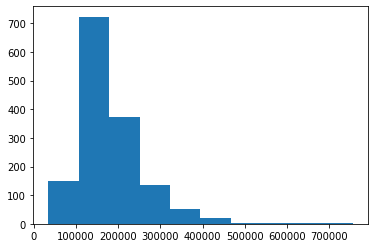

In [13]:
plt.hist(traindf.SalePrice)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

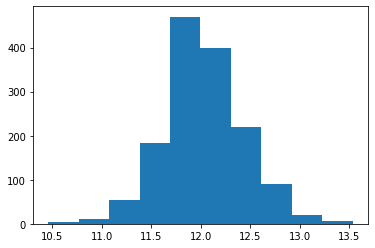

In [14]:
plt.hist(np.log(traindf.SalePrice))

In [15]:
#Finding quartiles of SalePrice
traindf.SalePrice.quantile([0.25,0.5,0.75])

0.25    129975.0
0.50    163000.0
0.75    214000.0
Name: SalePrice, dtype: float64

In [16]:
#IQR = 75th percentile-25th percentile
first_q = traindf.SalePrice.quantile(q=0.25)
third_q = traindf.SalePrice.quantile(q=0.75)
IQR =(third_q - first_q)
IQR

84025.0

In [18]:
mean = traindf.SalePrice.mean()

In [19]:
#Any number less than this is a suspected outlier.
mean-1.5*IQR

54883.69589041095

In [20]:
#Any number greater than this is a suspected outlier.
mean + 1.5*IQR

306958.6958904109

# The boundaries are found so I can remove the data that is out of these boundaries.

In [22]:
outlier_less = traindf[(traindf['SalePrice'] < 54883.69589041095)] 
#df4 = combined[combined['SalePrice'] > 36962.5] 
#df4['SalePrice']
#display(combined.isnull().sum())
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 2919)
display(outlier_less.SalePrice)

30      40000
495     34900
533     39300
710     52000
916     35311
968     37900
1337    52500
Name: SalePrice, dtype: int64

In [23]:
outlier_great = traindf[(traindf['SalePrice'] > 306958.6958904109) ]
outlier_great.fillna(method='bfill') 
#df4 = combined[combined['SalePrice'] < 289037.5 ] 
#print(df4['SalePrice'])
outlier_great.SalePrice

6       307000
11      345000
20      325300
35      309000
45      319900
53      385000
58      438780
65      317000
112     383970
118     320000
151     372402
159     320000
161     412500
167     325624
178     501837
185     475000
190     315000
196     311872
218     311500
224     386250
231     403000
238     318000
278     415298
309     360000
313     375000
320     342643
321     354000
326     324000
336     377426
349     437154
350     318061
377     340000
378     394432
389     426000
409     339750
423     315000
440     555000
473     440000
477     380000
480     326000
481     374000
496     430000
515     402861
524     315750
527     446261
540     315000
566     325000
568     316600
583     325000
585     369900
591     451950
595     319000
608     359100
610     313000
618     314813
642     345000
644     370878
654     350000
661     402000
664     423000
678     372500
688     392000
691     755000
692     335000
700     312500
702     361919
718     34

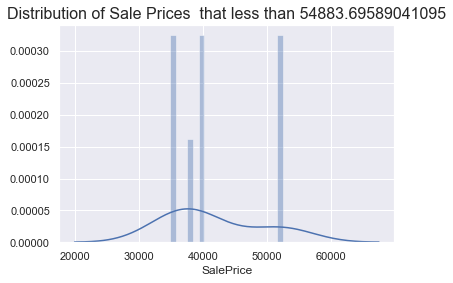

In [24]:
sns.set(color_codes=True)

sns.distplot(outlier_less.SalePrice,bins=20).set_title('Distribution of Sale Prices  that less than 54883.69589041095',fontsize=16);

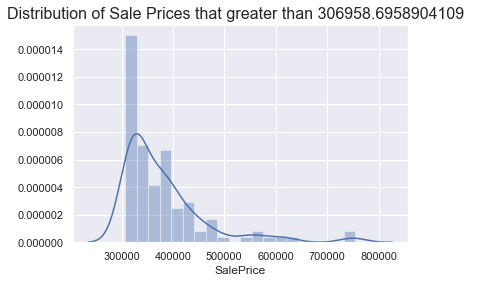

In [25]:
sns.set(color_codes=True)

sns.distplot(outlier_great['SalePrice'],bins=20).set_title('Distribution of Sale Prices that greater than 306958.6958904109  ',fontsize=16);